# Prosper Loan Analysis
## by Akinyemi Akinbode

## Investigation Overview


> In this investigation, I am interested in finding out relationships among different variables as found in the dataset. 

> I am also interested in discovering the best variable in predicting deliquency
 

## Dataset Overview
> The dataset contains peer-to-peer loan information of approximately 113,000 loans from Prosper Funding LLC.

> The major attributes analysed include: 

> Combined Credit Grade, Income RangeBorrower, APRBorrower Rates, Amount Delinquent,Current Deliquencies, Employment Status, Listing Category, Loan Original Amount and Term 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData (1).csv')

In [3]:
cols = ['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'IsBorrowerHomeowner','Occupation', 'EmploymentStatus', 'CurrentDelinquencies', 'AmountDelinquent', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'MonthlyLoanPayment']

In [4]:
loan_sub = loan[cols]
# Replace the na values in Credit Grade and ProsperRating with empty spaces so we can merge the columns into one
loan_sub['CreditGrade'].fillna('', inplace = True)
loan_sub['ProsperRating (Alpha)'].fillna('', inplace = True)
loan_sub['Combined_credit_grade'] = loan_sub['CreditGrade'] + loan_sub['ProsperRating (Alpha)']
loan_sub['ListingCategory (numeric)'] = loan_sub['ListingCategory (numeric)'].astype('category')

In [5]:
drop_list = ['ProsperRating (Alpha)', 'CreditGrade']
loan_sub.drop(drop_list, axis = 1, inplace = True)

loan_sub['IncomeRange'].replace('Not displayed', np.nan, inplace = True)
loan_sub['IncomeRange'].replace('Not employed', '$0', inplace = True)

In [6]:
# convert Combined_gredit_grade into ordered categorical types
ordinal_var_dict = {'Combined_credit_grade': ['AA','A','B','C','D','E','HR'],
                    'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_sub[var] = loan_sub[var].astype(ordered_var)

## Distribution of Loan Amount

> It is evident from the distribution that most of the loans taken is rightly skewed. Using the distplot function with more bins showed that the loans are usually round figures as evident in spikes on 5,000 10,000 , 15,000 and so on.

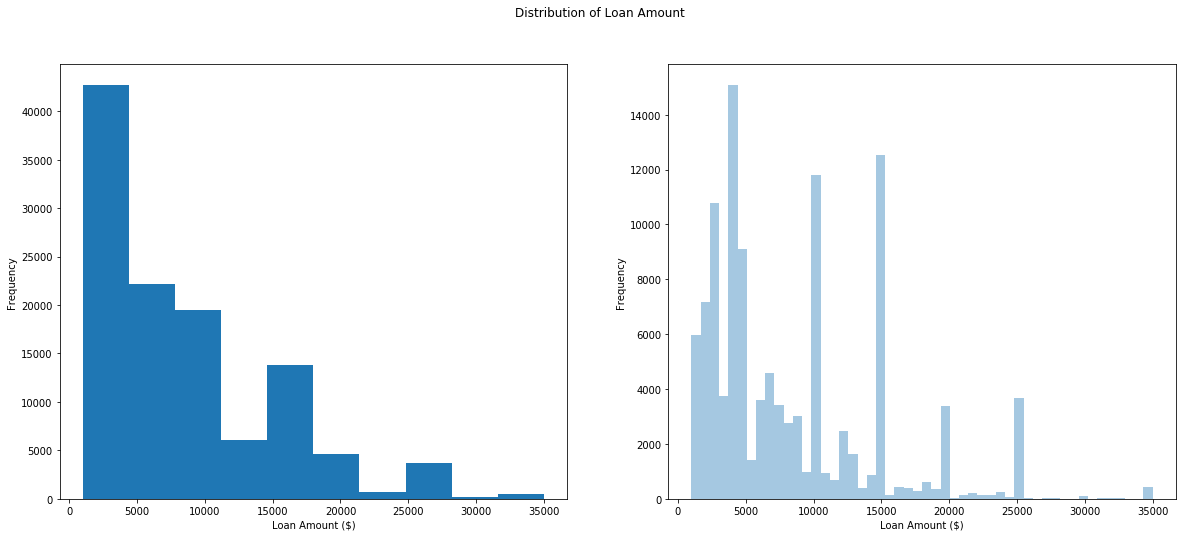

In [8]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.hist(data = loan_sub, x = 'LoanOriginalAmount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sb.distplot(loan_sub['LoanOriginalAmount'], kde = False, color = base_color)
plt.ylabel('Frequency')
plt.xlabel('Loan Amount ($)')
plt.suptitle('Distribution of Loan Amount');

## Distribution of Credit Grades

> The distribution is unimodal and skewed to the right. It is interesting to see  that there are more borrowers who are termed high risk than people with excellent credit grade

Text(0.5,1,'Distribution of Credit grades')

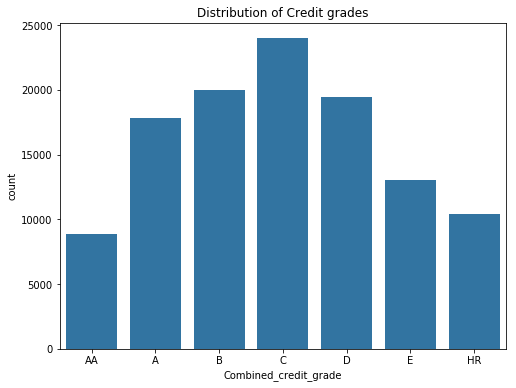

In [9]:
plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_sub, x = 'Combined_credit_grade', color = base_color)
plt.title('Distribution of Credit grades')

## Distribution of Current Delinquencies
> The distribution is highly skewed to the right and we can see that most of current deliquencies is 1

(-1, 20)

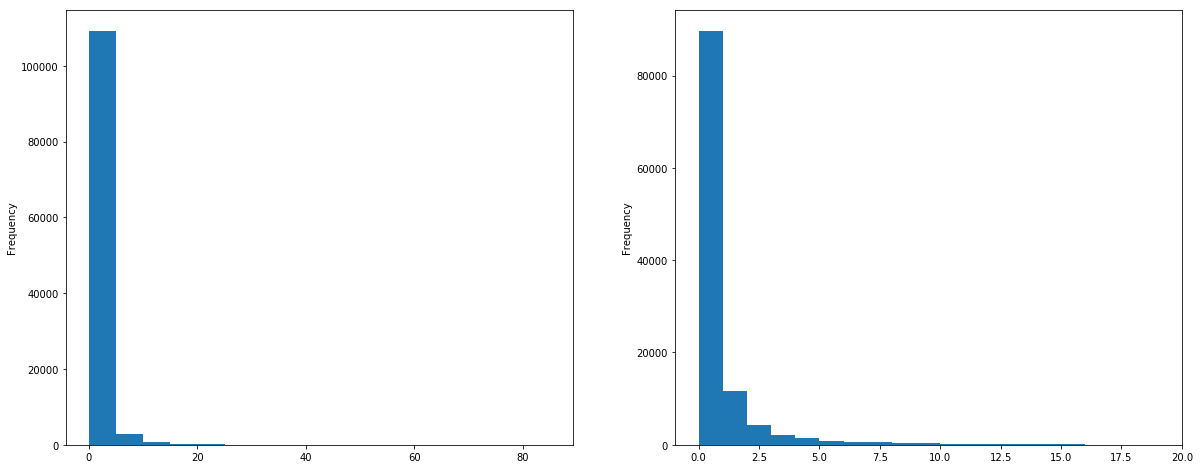

In [10]:
# Lets look at the distribution of no of deliquencies
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
bins = np.arange(0, loan_sub['CurrentDelinquencies'].max()+5, 5 )
loan_sub['CurrentDelinquencies'].plot(kind = 'hist', bins = bins)
#Lets zoom in from 0 to 20 as it seems most of the action is concentrated there 
plt.subplot(1,2,2)
bins = np.arange(0, loan_sub['CurrentDelinquencies'].max()+1, 1 )
loan_sub['CurrentDelinquencies'].plot(kind = 'hist', bins = bins)
plt.xlim(-1, 20)


## Plot to investigate relationship between numeric variables
> It is worth noting that most of our numeric variables seem to not have much correlation contrary to what was suspected before the analysis. The only visible positive correlation are betweeen Borrower Rate and Borrower APR which are almost the same thing with the exception of the fees

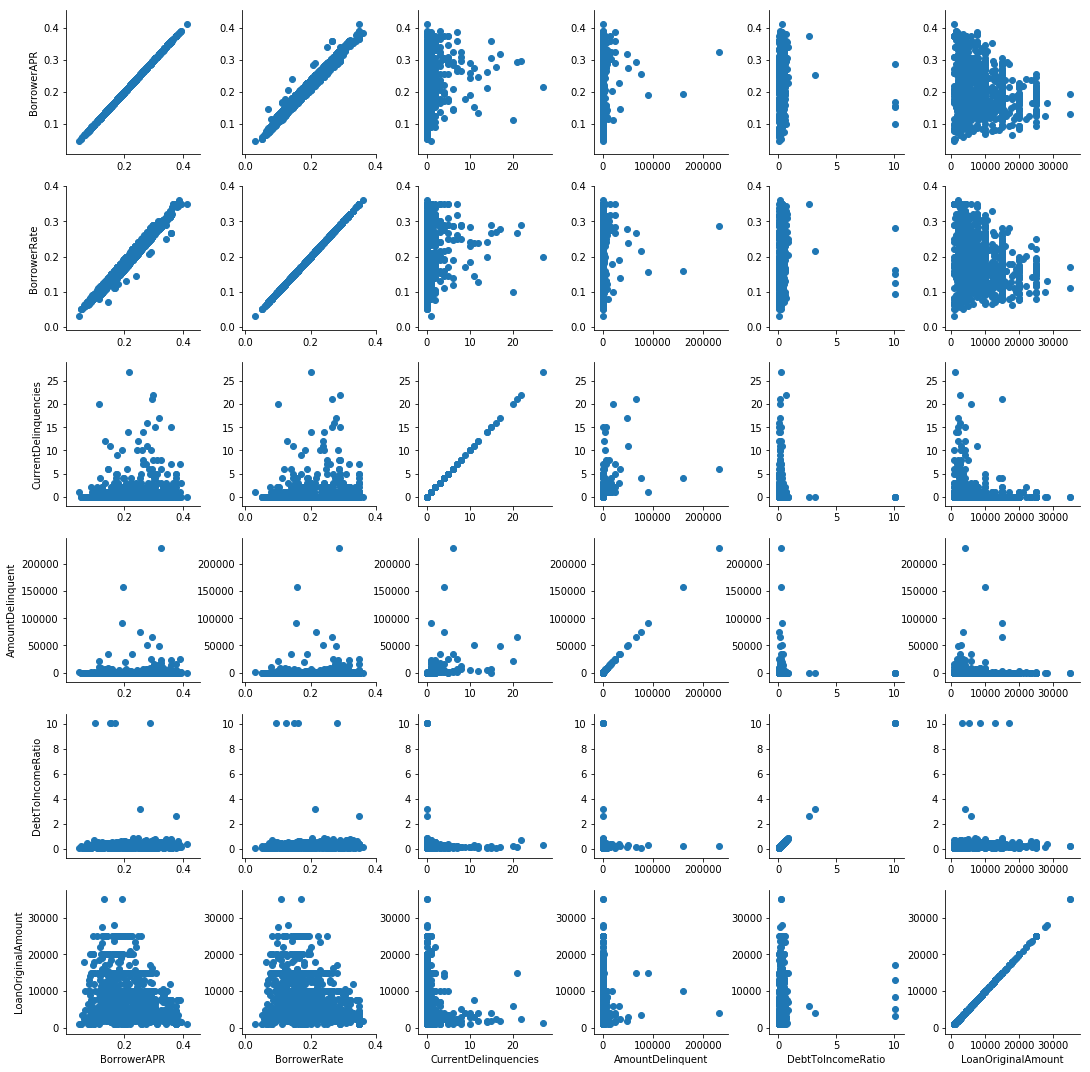

In [11]:
numeric_vars = [ 'BorrowerAPR', 'BorrowerRate','CurrentDelinquencies', 'AmountDelinquent','DebtToIncomeRatio', 'LoanOriginalAmount']
# Plotting a plot matrix to investigate the relationship between the variables 
loan_sub_samp = loan_sub.sample(n=1000, replace = False)

g = sb.PairGrid(data = loan_sub_samp, vars = numeric_vars)
g.map(plt.scatter);

## Credit Grade against Count and Amount of Deliquencies

> Bar chart shows that Deliquency increases across the credit grades from Excellent credit score to high risk in terms of count and amount

Text(0.5,0.98,'Çombined Credit Grade against Amount Deliquent')

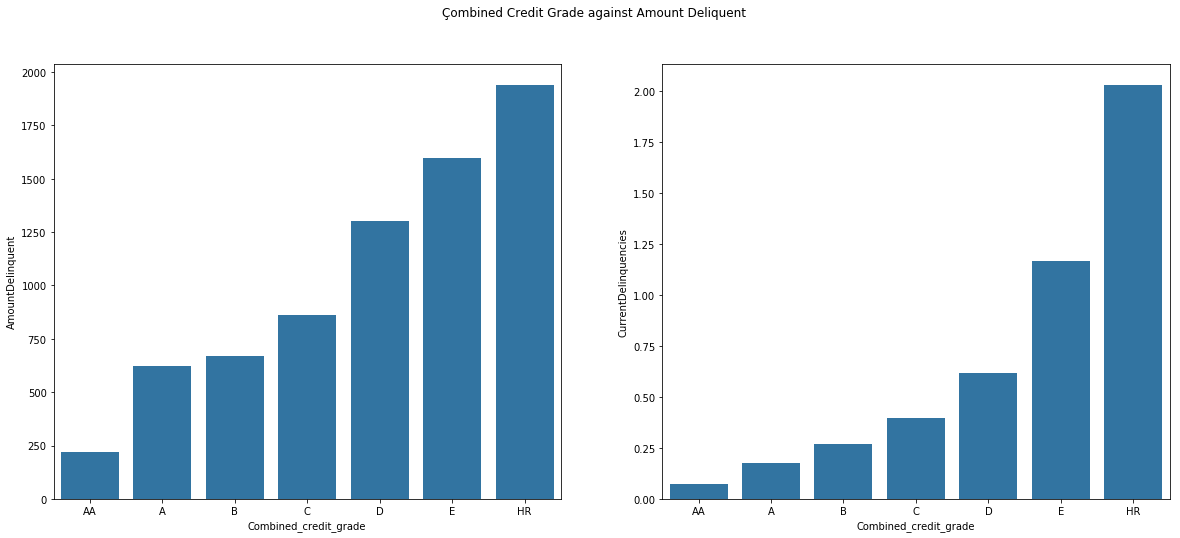

In [12]:
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.barplot(data = loan_sub, x = 'Combined_credit_grade', y = 'AmountDelinquent', color = base_color, ci = 0)

plt.subplot(1,2,2)
base_color = sb.color_palette()[0]
sb.barplot(data = loan_sub, x = 'Combined_credit_grade', y = 'CurrentDelinquencies', color = base_color, ci = 0)
plt.suptitle('Çombined Credit Grade against Amount Deliquent')

## Income Grade against Count and Amount of Deliquencies
> There seem to be a relationshipbetween high income range and amount of delinquent loans. However, for the no of current deliquencies, borrowers in the lower end of income tend to have more delinquencies than people in the high income range.

> This means despite the fact that low income earners are more likely to have delinquent facilities compared to their high income counterparts, the volume of the amount of the high earners is bigger.

Text(0.5,1,'Income range against Deliquency')

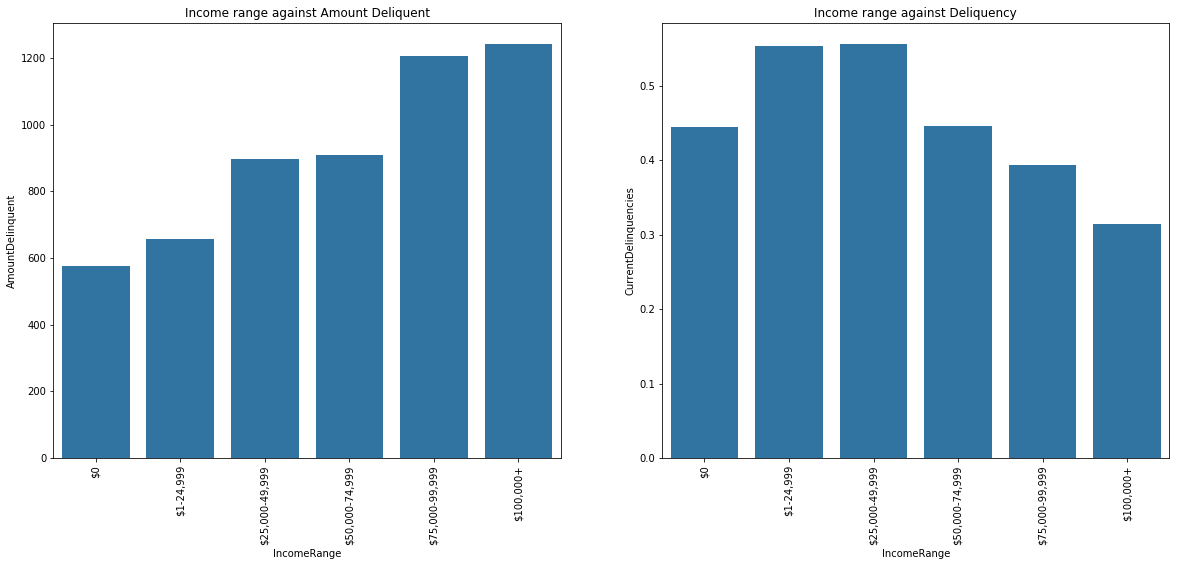

In [13]:
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.barplot(data = loan_sub, x = 'IncomeRange', y = 'AmountDelinquent', ci = 0, color = base_color)
plt.xticks(rotation=90);
plt.title('Income range against Amount Deliquent')

plt.subplot(1,2,2)
sb.barplot(data = loan_sub, x = 'IncomeRange', y = 'CurrentDelinquencies', ci = 0, color = base_color)
plt.xticks(rotation=90)
plt.title('Income range against Deliquency')

## Count of Income Range vs Credit Grade
> From this clustered bar chart, we can see the trend of higher incomes correlate to a higher credit rating qualifying the borrower for the best (lowest) interest rates which confirms our earlier chart on APR and Loan Amount

> Having an income of $75k+ doesn't automatically guarantee the best crediratings.

> Conversely, it also appears that in the  0𝑖𝑛𝑐𝑜𝑚𝑒𝑟𝑎𝑛𝑔𝑒,𝑡ℎ𝑒𝑟𝑒𝑎𝑟𝑒𝑎ℎ𝑖𝑔ℎ𝑎𝑚𝑜𝑢𝑛𝑡𝑜𝑓"𝐴𝐴"𝑙𝑜𝑎𝑛𝑠𝑟𝑒𝑙𝑎𝑡𝑖𝑣𝑒𝑡𝑜𝑡ℎ𝑒 1-25k income range. This is very interesting as I do not understand how we can have AA loans for borrowers that make no income

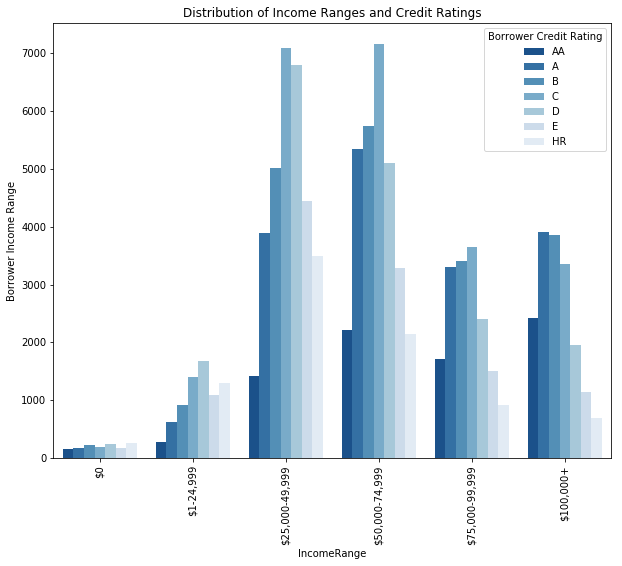

In [14]:
plt.figure(figsize = [10,8])

ax = sb.countplot(data = loan_sub, x = 'IncomeRange', hue = 'Combined_credit_grade',
                   palette = 'Blues_r')

ax.legend(title = 'Borrower Credit Rating')
plt.xticks(rotation = 90)
plt.title('Distribution of Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range');

## Average count of deliquencies across Credit Rating and Income Range
> From the heat map we continue to see the trend of lower credit ratings leading to high count of deliquencies . It's interesting to see that the income range does not play a big influence on the count of deliquencies as the average count of deliquencies is higher in the 25k-50k range than in borrowers who earn no income.

> Income range does not seem to matter with no of deliquencies except for borrowers with bad credit ratings.

> This shows us that a better predictor of deliquencies is using credit grade rather than the relationship between the numeric variables.

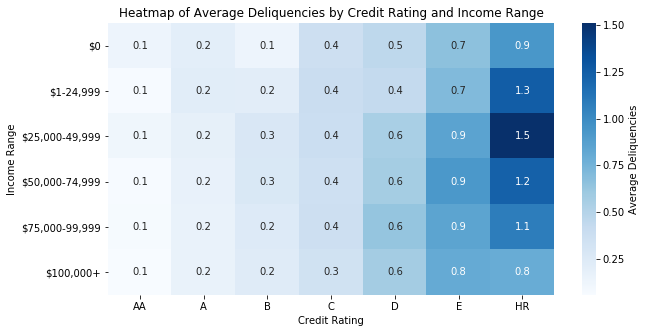

In [15]:
# creating a heat map that shows the average count of deliquencies across Credit Rating and Income Range
plt.figure(figsize = [10,5])

cat_mean = loan_sub.groupby(['Combined_credit_grade', 'IncomeRange']).mean()['CurrentDelinquencies']
cat_mean = cat_mean.reset_index(name = 'Average Delinquencies')
cat_mean = cat_mean.pivot(index = 'IncomeRange', columns = 'Combined_credit_grade', values = 'Average Delinquencies')

sb.heatmap(cat_mean, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Average Deliquencies'})
plt.xlabel('Credit Rating')
plt.ylabel('Income Range')
plt.title('Heatmap of Average Deliquencies by Credit Rating and Income Range');

In [1]:
!jupyter nbconvert <Part_II_slide_deck_template>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_slide_deck_template: No such file
